Kanishk Mair (kmair@andrew.cmu.edu)
Date: 2018-08-30 15:27:02.830667


- ASSIGNMENT: fun-1
- POINTS: 1
- CATEGORY: homework
- RUBRIC: default
- RUBRIC_CATEGORIES: technical, presentation
- RUBRIC_WEIGHTS: 0.8, 0.2
- DUEDATE: 2018-09-07 23:59:59
- GRADER: John Kitchin


The van der Waals equation of state for a gas is defined by:

$\left(P + \frac{a}{V^2}\right)(V - b) = RT$

where $a$ and $b$ are defined by:

$a = \frac{27}{64}\left(\frac{R^2 T_c^2}{P_c}\right)$

$b = \frac{R T_c}{8 P_c}$

In these equations, $V$ is the molar volume, $P$ is the pressure, and $T$ is the temperature.

$R$ is the gas constant, $P_c$ is the critical pressure of
the gas, and $T_c$ is the critical temperature.

For ammonia, $P_c = 111.3$ atm, $T_c = 405.5$ K, and in these units, $R = 0.08206$ (atm L)/(mol K).

Suppose the temperature is 450 K, and the pressure is 56 atm. Now, the only undefined quantity is the molar volume, and we would like to solve for it. We have not learned how to do this yet, so today we will just use a graphical method to estimate how to do it.

It is not worth the effort to do all the algebra required to find $V$. Instead, we recognize that the solution will be the value of $V$ that makes the following equation true:

$f(V) = \left(P + \frac{a}{V^2}\right)(V - b) - RT = 0$

So, if we define the function above, and plot it for some range of $V$, we can graphically estimate the solution by looking on the graph where is the function equal to zero.




# Define a f(V)



Define a function for f(V) as defined above.



In [21]:
Pc = 111.3  # in atm
Tc = 405.5  # in K
R = 0.08206 # in (atm-L)/(mol-K)
a = 27/64 * (R**2 * Tc**2 / Pc)
b = R * Tc / (8 * Pc)
P = 56      # in atm
T = 450     # in K
print(f'a = {a:1.3f} and b = {b:1.3f}')

a = 4.197 and b = 0.037


In [22]:
def f(V):   # V is in litres
    y = (P + a / (V**2)) * (V - b) - R * T
    return y 

In [23]:
f(2)    # Integer

75.03947364406815

In [24]:
f(np.array([5, 10]))    # Array

array([241.81332733, 521.39833809])

In [25]:
import numpy as np
V = np.linspace(0.1,1)

f(V)    # Array

array([ -7.13482606,  -8.12881322,  -9.05762039,  -9.79463685,
       -10.32358968, -10.66117149, -10.8319789 , -10.86026056,
       -10.76744474, -10.5716999 , -10.28818035,  -9.92945969,
        -9.50597187,  -9.02640054,  -8.49800415,  -7.92688052,
        -7.31817972,  -6.67627488,  -6.00489909,  -5.30725553,
        -4.58610629,  -3.84384442,  -3.08255262,  -2.30405124,
        -1.50993785,  -0.70161992,   0.11965798,   0.95279152,
         1.79679753,   2.65079796,   3.5140063 ,   4.38571602,
         5.26529071,   6.15215565,   7.04579055,   7.94572328,
         8.85152443,   9.76280265,  10.6792005 ,  11.60039088,
        12.52607389,  13.45597408,  14.389838  ,  15.32743206,
        16.26854062,  17.21296432,  18.16051856,  19.11103216,
        20.06434619,  21.02031285])

Your function should work for a single value of $V$, or a numpy.array of values.




# Plot f(V) over a range of V, and find a solution to the equation



Make a plot for an array of $V$ values (e.g. use np.linspace to create an array).

You can estimate the solution from the graph by looking for where the function intersects the x-axis. Adjust the molar volume range so you can estimate the solution to two decimal places.

Note: you can turn grid-lines on your plot with the line `plt.grid()`



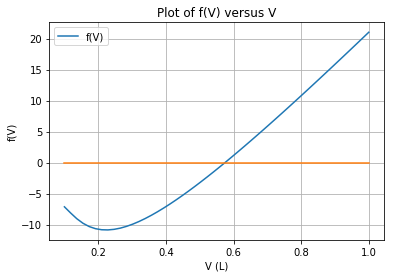

In [26]:
import matplotlib.pyplot as plt
plt.plot(V, f(V))
plt.plot(V, np.zeros(len(V)))
plt.xlabel('V (L)')
plt.ylabel('f(V)')
plt.legend(['f(V)'])
plt.title('Plot of f(V) versus V')  
plt.grid()

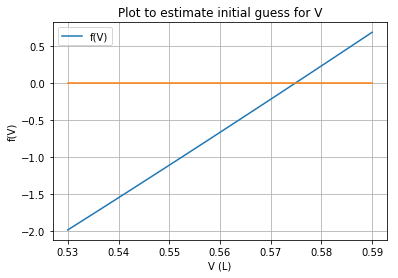

In [27]:
# Graphically, the root of functions seems to be in range: (0.53, 0.59).
import numpy as np
V = np.linspace(0.53, 0.59)
plt.plot(V, f(V))
plt.plot(V, np.zeros(len(V)))
plt.xlabel('V (L)')
plt.ylabel('f(V)')
plt.legend(['f(V)'])
plt.title('Plot to estimate initial guess for V')  
plt.grid()

In [28]:
import numpy as np
from scipy.optimize import fsolve

V = fsolve(f, 0.575)

print(f'For the required root, the volume is = {V[0]:1.2f} litres.')

For the required root, the volume is = 0.57 litres.
